In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Imports:
from hammer_sim import G_ACCEL, HammerSimulation
import os
import numpy as np

In [33]:
json_filename = "hammer_parameters.json"
hammer_sim = HammerSimulation(json_filename)

In [34]:
# Define ODE function:
def hammer_ODE(t, y):
    return (y[1], - G_ACCEL * np.sin(y[0]) / hammer_sim.hammer_structure.L_hammer)

In [35]:
hammer_sim.configure_ODE_func(hammer_ODE)

In [36]:
hammer_sim.run_sim()

6.260621693794707


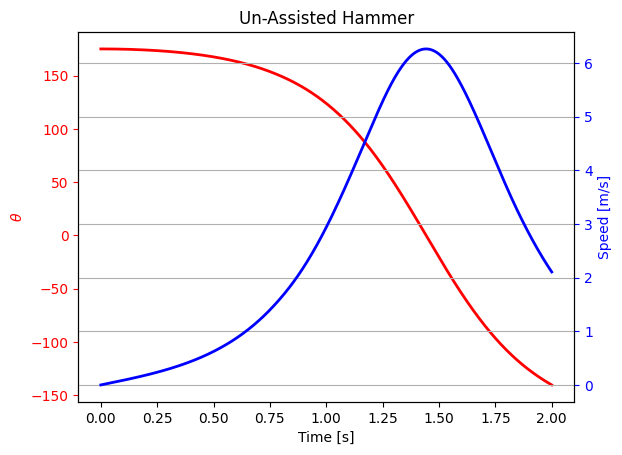

In [37]:
print(hammer_sim.get_max_speed())
hammer_sim.plot_speed_and_angle("Un-Assisted Hammer")